In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, SpectralClustering, Birch
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg

In [3]:
seed = 42

In [4]:
age = pd.read_excel("Ages.xlsx", skiprows = 6)
sex = pd.read_excel("Sex.xlsx", skiprows = 6)
interests = pd.read_excel("Interests.xlsx", skiprows = 6)
pages = pd.read_excel("PagesTranslated.xlsx", skiprows = 0)
places = pd.read_excel("Places.xlsx", skiprows = 6)
requests = pd.read_excel("Requests.xlsx", skiprows = 6)

In [5]:
pages['Количество мужчин'] = pages['Визиты'] * pages['Доля мужчин']
pages['Количество женщин'] = pages['Визиты'] * pages['Доля женщин']
pages['Количество до 18'] = pages['Менее 18 лет'] * pages['Визиты']
pages['Количество 18-24'] = pages['18‑24 лет'] * pages['Визиты']
pages['Количество 25-34'] = pages['25‑34 лет'] * pages['Визиты']
pages['Количество 35-44'] = pages['35‑45 лет'] * pages['Визиты']
pages['Количество 45-55'] = pages['45‑55 лет'] * pages['Визиты']

In [6]:
#x_columns = ['Количество мужчин', 'Количество женщин', 'Количество до 18', 'Количество 18-24', 'Количество 25-34', 'Количество 35-44', 'Количество 45-55']
x_columns = ['Доля мужчин', 'Доля женщин', 'Менее 18 лет', '18‑24 лет', '25‑34 лет', '35‑45 лет', '45‑55 лет']

In [7]:
def get_color(c):
    if c == 0:
        return "green"
    elif c == 1:
        return "blue"
    elif c == 2:
        return "red"
    elif c == 3:
        return "yellow"
    elif c == 4:
        return "pink"
    else:
        return "cyan"

In [8]:
def plot(n, x, y, title = None):

    #for i, txt in enumerate(n):
        #ax.annotate(txt, (compressed_x[i][0], compressed_x[i][0]), color=get_color(y_pred[i]))
    plt.figure(figsize=(12, 12))
    plt.title(title)
    plt.scatter(x[:, 0], x[:, 1], color = [get_color(y[i]) for i in range(len(n))])
    plt.show()

In [9]:
def plot_subplots(n, x, y, columns, name):

    fig, axes = plt.subplots(x.shape[1] - 1, x.shape[1] - 1)
    fig.set_size_inches(49, 49)

    for i in range(x.shape[1]):
        for j in range(i + 1, x.shape[1]):

            title =  columns[i] + " — " + columns[j]
            axes[i][j - 1].set_title(title)

            x_ = np.vstack([x[:, i], x[:, j]]).T
            axes[i][j - 1].scatter(x_[:, 0], x_[:, 1], color = [get_color(y[i]) for i in range(len(n))])

    plt.savefig(name)

DATA

In [10]:
x = pages[x_columns].to_numpy()

CLUSTERIZATION

In [11]:
n_clusters = 10
cls = SpectralClustering(n_clusters=n_clusters, n_init=10, random_state = seed)
labels = cls.fit_predict(x)


print(len(labels))
for cluster in range(n_clusters):
    print(f"{cluster + 1}:", len(labels[labels == cluster]))

5582
1: 743
2: 104
3: 1822
4: 497
5: 490
6: 592
7: 412
8: 69
9: 37
10: 816


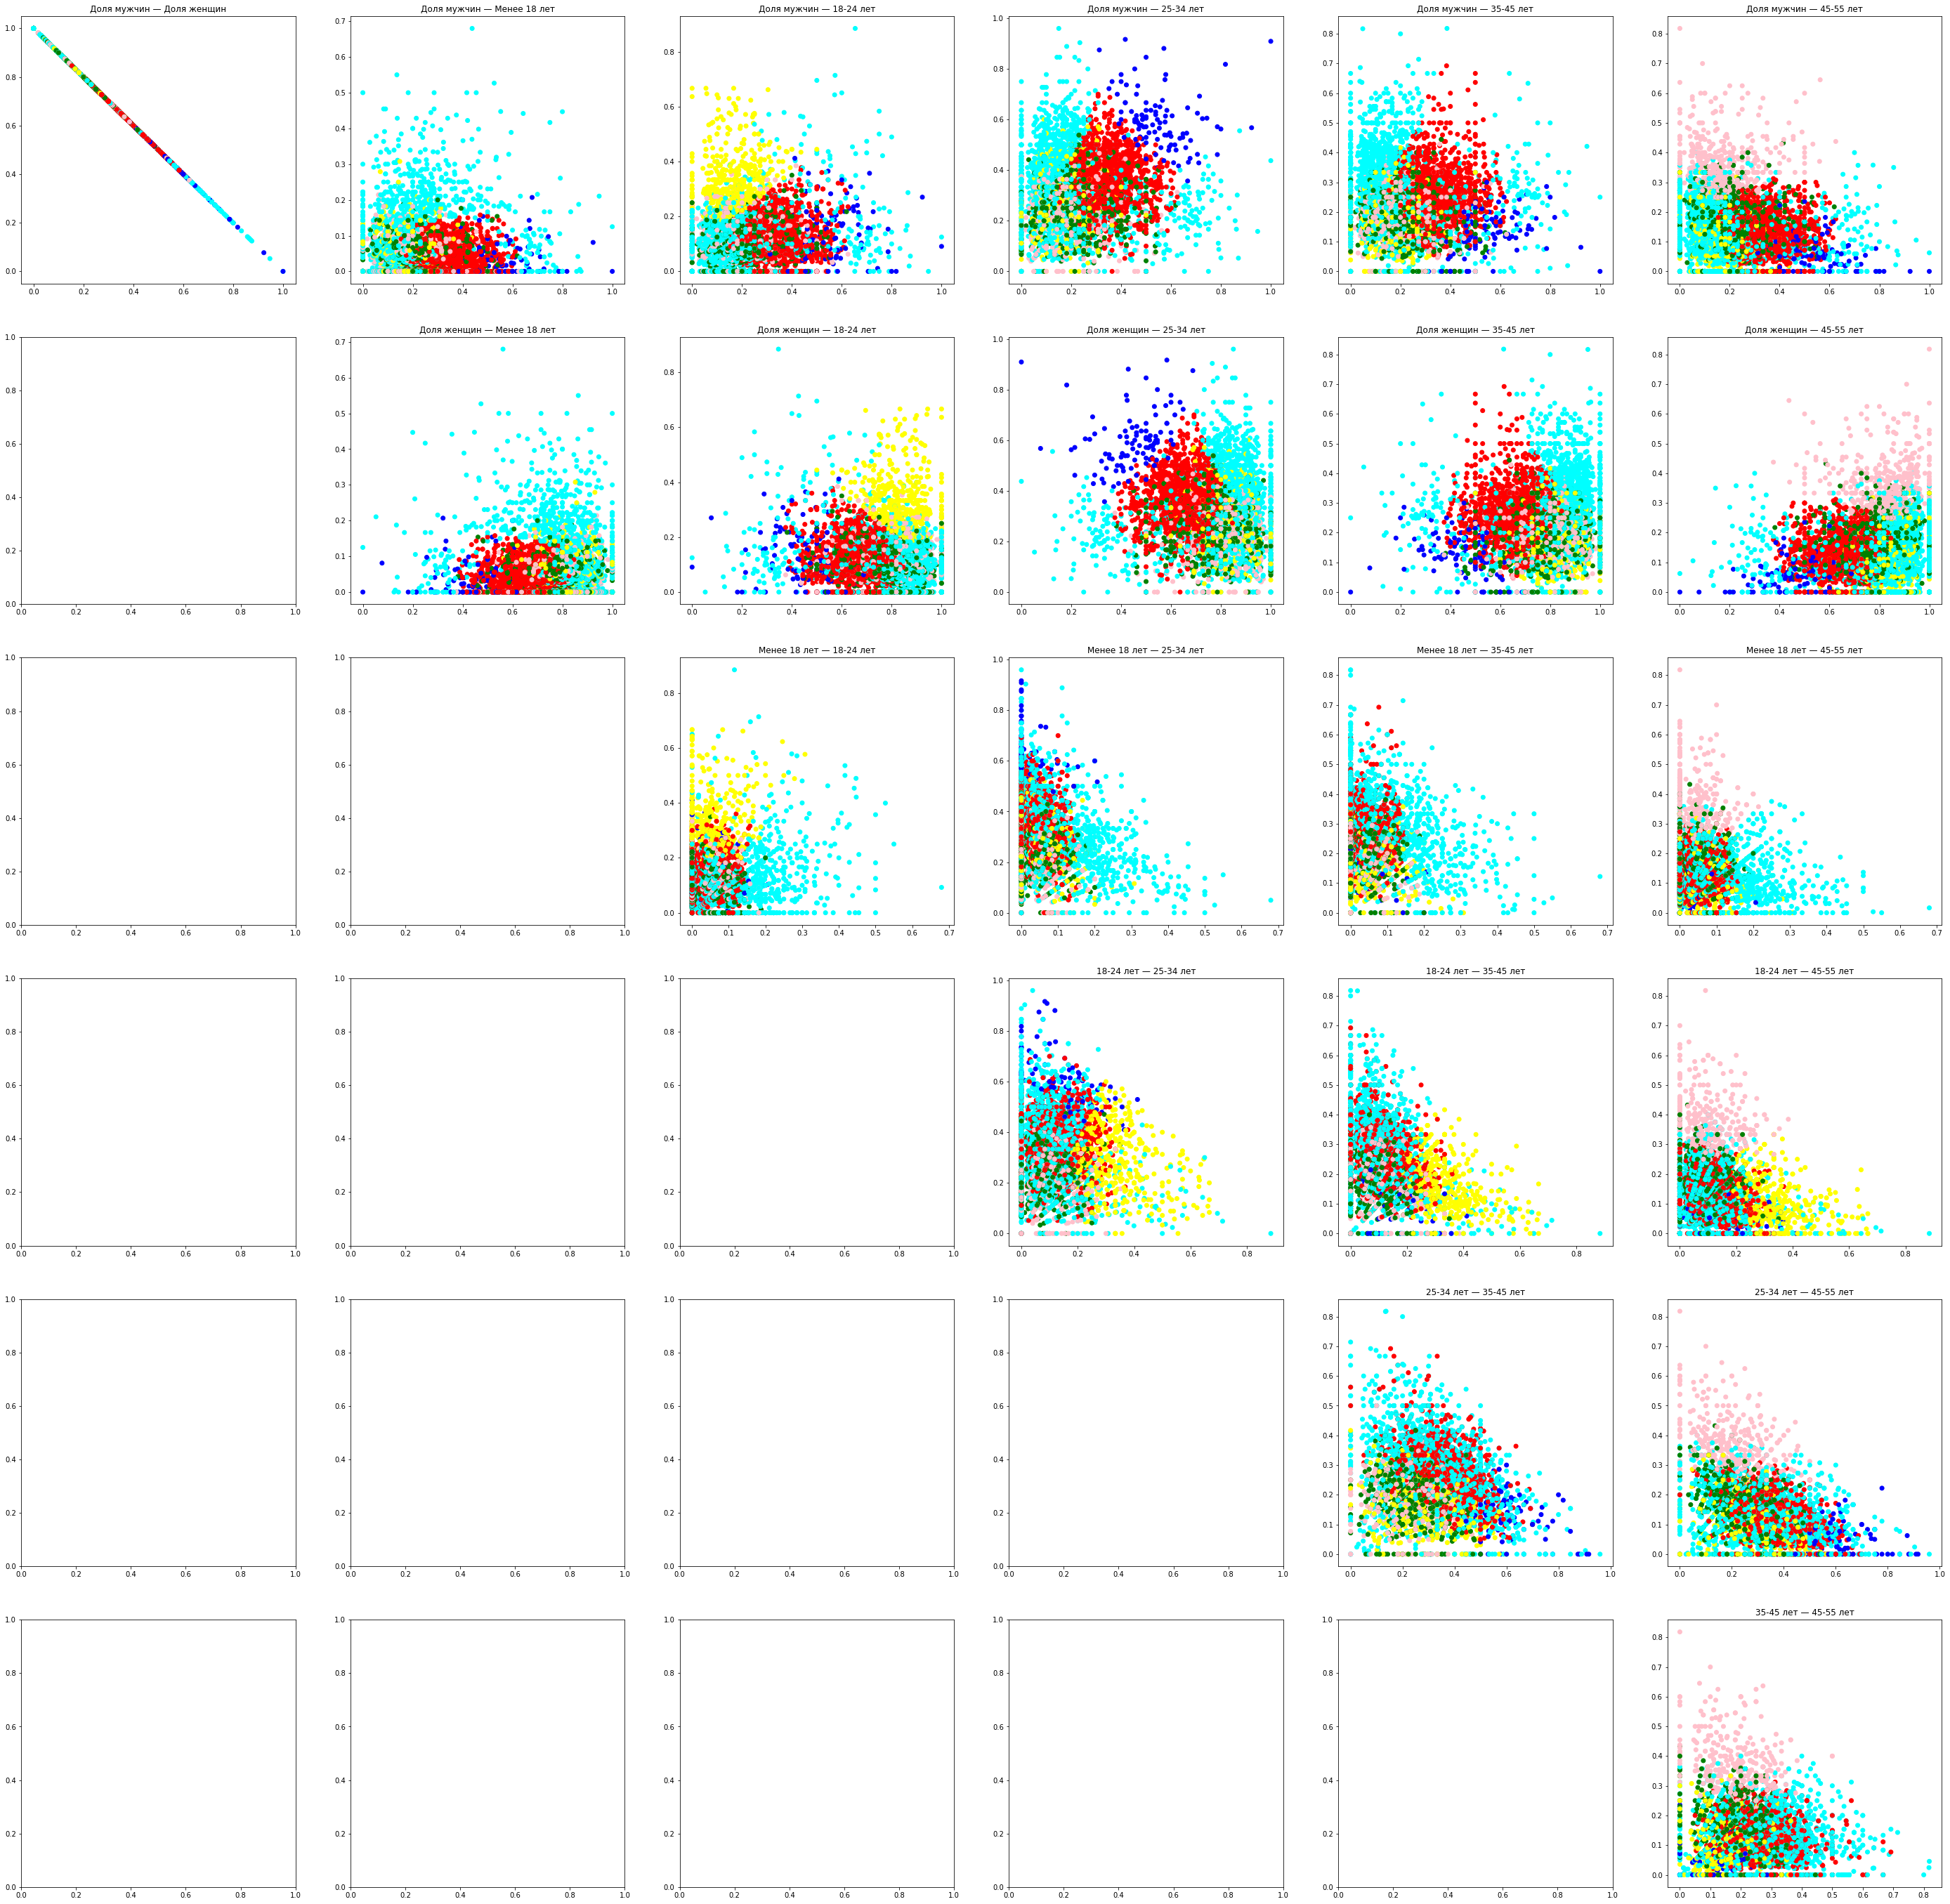

In [12]:
plot_subplots(pages['Перевод'], x, labels, x_columns, "Clusters" + str(n_clusters) + ".png")

In [13]:
img = mpimg.imread('Clusters' + str(n_clusters) + '.png')
plt.figure(figsize = (49, 49))
plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'Clusters.10png'

In [ ]:
for i in range(x.shape[1]):
    for j in range(i + 1, x.shape[1]):
        plot(pages['Перевод'], np.vstack([x[:, i], x[:, j]]).T, labels, 
             title = x_columns[i] + " — " + x_columns[j])

FIND CENTERS

In [415]:
from sklearn.metrics import pairwise_distances_argmin_min

In [416]:
centers = clusters.cluster_centers_
closest, _ = pairwise_distances_argmin_min(clusters.cluster_centers_, test_pages)

In [417]:
for index in closest:
    print(pages.iloc[index]['Перевод'], pages.iloc[index]['Количество мужчин'], pages.iloc[index]['Количество женщин'])

выставка роковая встреча винсент ван гог и поль гоген 42.10280373831775 222.89719626168224
nan 277.59692898272556 414.40307101727444
